In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import structural_similarity as ssim

## 1.1. Изображение-1. До преобразования

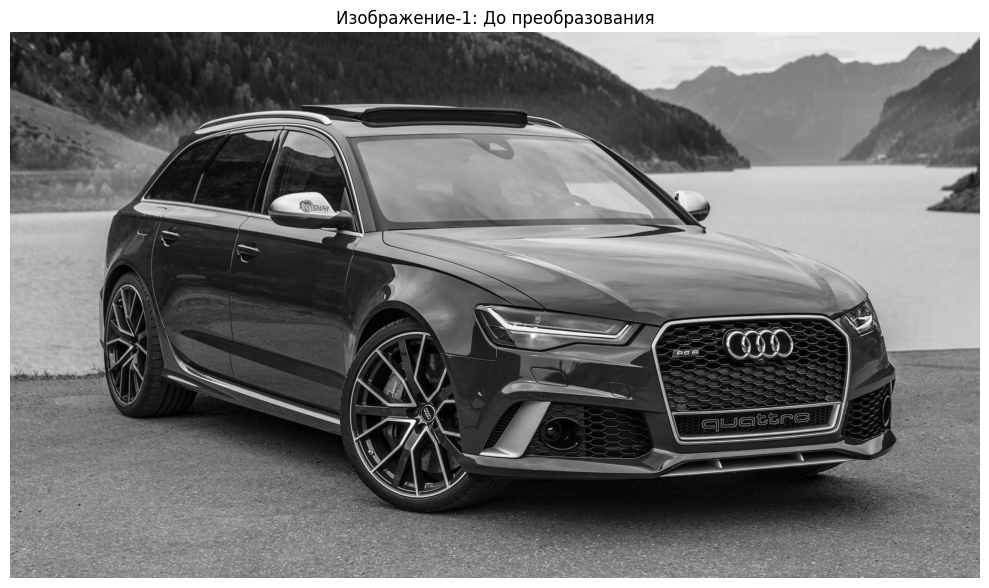

In [19]:
img_path = '../items/Cars.jpeg'
img_rgb = Image.open(img_path)

img_gray = img_rgb.convert('L')
img_before = np.array(img_gray)

plt.figure(figsize=(10, 6))
plt.imshow(img_before, cmap='gray')
plt.title('Изображение-1: До преобразования')
plt.axis('off')
plt.tight_layout()
plt.show()

## 1.2. Статистические характеристики изображения (до преобразования)
### Основные признаки: яркость и контраст

In [20]:
def calc_stats(img):
    return {
        'mean': np.mean(img),
        'std': np.std(img),
        'min': np.min(img),
        'max': np.max(img),
        'range': np.max(img) - np.min(img)
    }

# Статистика до преобразования
stats_before = calc_stats(img_before)

print("Статистические характеристики (ДО преобразования)")
print(f"Яркость (среднее): {stats_before['mean']:.2f}")
print(f"Контраст: {stats_before['std']:.2f}")
print(f"Минимальная яркость: {stats_before['min']}")
print(f"Максимальная яркость: {stats_before['max']}")
print(f"Диапазон яркости: {stats_before['range']}")

Статистические характеристики (ДО преобразования)
Яркость (среднее): 102.87
Контраст: 62.63
Минимальная яркость: 0
Максимальная яркость: 255
Диапазон яркости: 255


## 1.3. Гистограмма яркости (до преобразования)

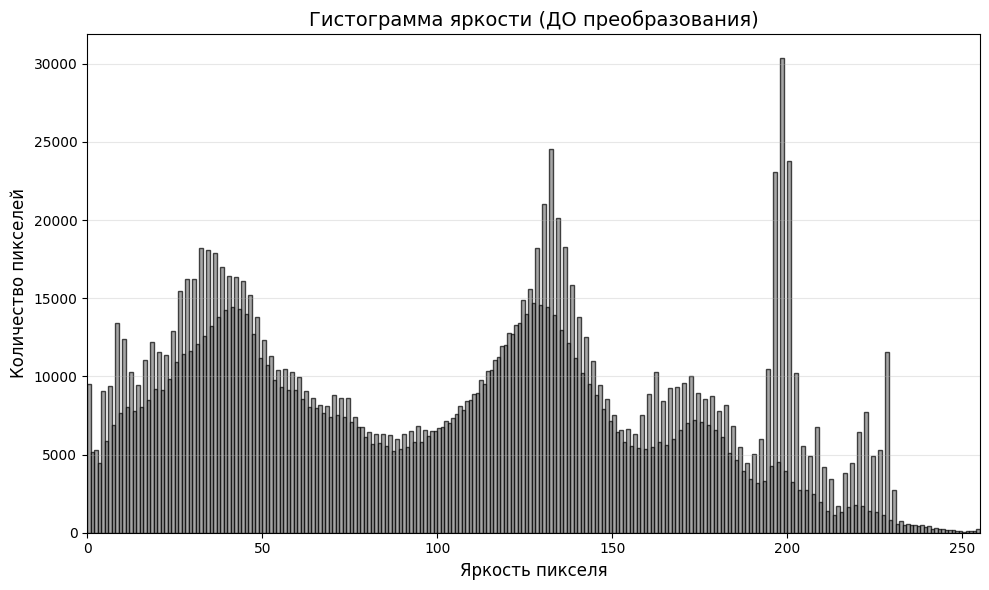


Минимальное значение яркости: 0
Максимальное значение яркости: 255
Диапазон яркости: 255


In [21]:
plt.figure(figsize=(10, 6))
plt.hist(img_before.flatten(), bins=256, range=[0, 256], color='gray', alpha=0.7, edgecolor='black')
plt.title('Гистограмма яркости (ДО преобразования)', fontsize=14)
plt.xlabel('Яркость пикселя', fontsize=12)
plt.ylabel('Количество пикселей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xlim([0, 255])
plt.tight_layout()
plt.show()

print(f"\nМинимальное значение яркости: {stats_before['min']}")
print(f"Максимальное значение яркости: {stats_before['max']}")
print(f"Диапазон яркости: {stats_before['range']}")

## 1.4. Изображение-2. После преобразования
### Эквализация гистограммы яркости

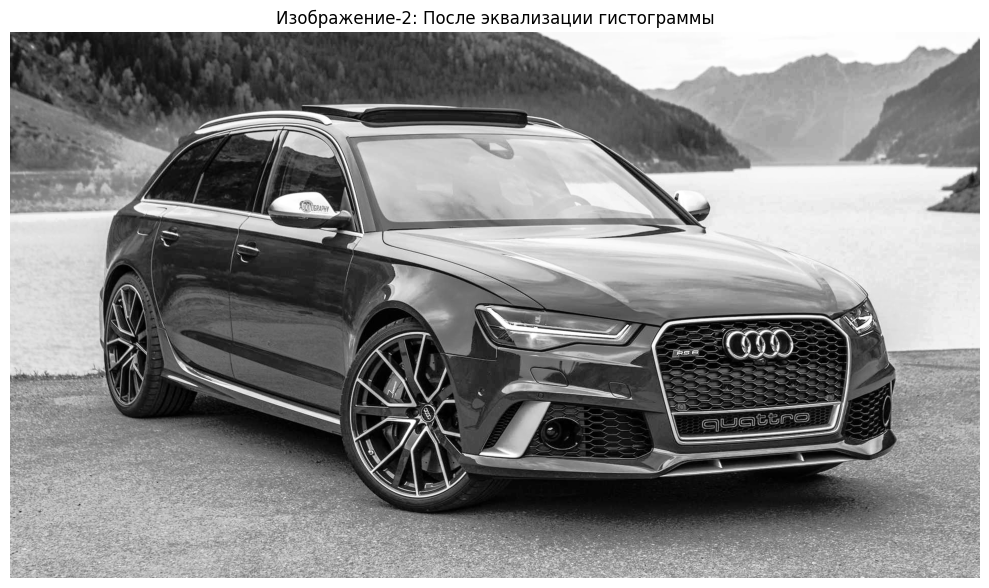

In [22]:
img_after = cv2.equalizeHist(img_before)

plt.figure(figsize=(10, 6))
plt.imshow(img_after, cmap='gray')
plt.title('Изображение-2: После эквализации гистограммы')
plt.axis('off')
plt.tight_layout()
plt.show()

## 1.5. Визуализация гистограммы после эквализации

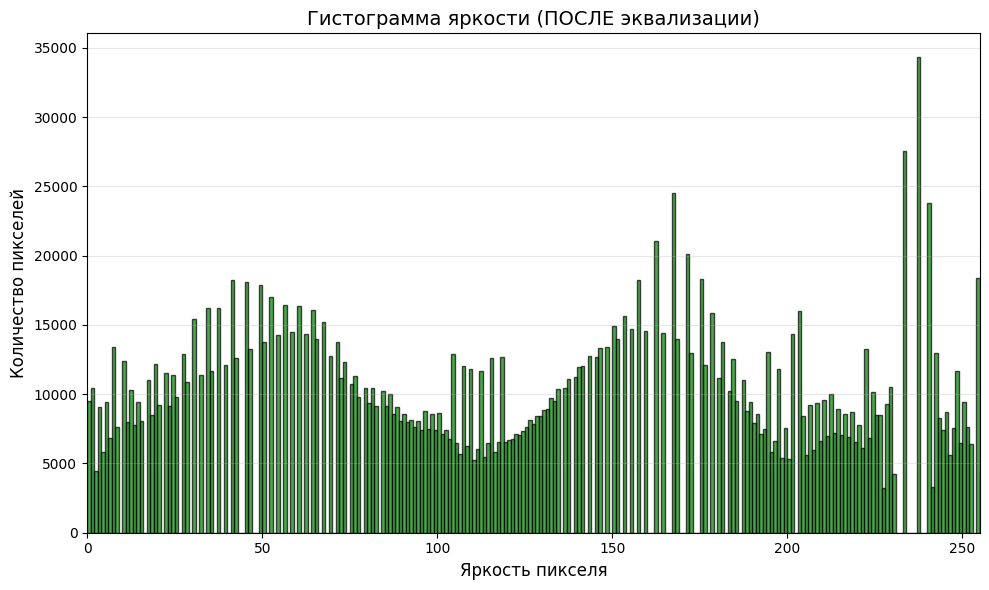

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(img_after.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7, edgecolor='black')
plt.title('Гистограмма яркости (ПОСЛЕ эквализации)', fontsize=14)
plt.xlabel('Яркость пикселя', fontsize=12)
plt.ylabel('Количество пикселей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xlim([0, 255])
plt.tight_layout()
plt.show()

## 1.6. Статистические характеристики после эквализации
### Основные признаки: яркость и контраст

In [24]:
stats_after = calc_stats(img_after)

print("Статистические характеристики (ПОСЛЕ эквализации)")
print(f"Яркость (среднее): {stats_after['mean']}")
print(f"Контраст: {stats_after['std']}")
print(f"Минимальная яркость: {stats_after['min']}")
print(f"Максимальная яркость: {stats_after['max']}")
print(f"Диапазон яркости: {stats_after['range']}")

Статистические характеристики (ПОСЛЕ эквализации)
Яркость (среднее): 127.60161988811728
Контраст: 73.9251192854046
Минимальная яркость: 0
Максимальная яркость: 255
Диапазон яркости: 255


## 1.7. Сравнение статистических характеристик до и после преобразования

In [25]:
mse_value = mse(img_before, img_after)
psnr_value = psnr(img_before, img_after, data_range=255)
ssim_value = ssim(img_before, img_after, data_range=255)

print("Сравнение характеристик ДО и ПОСЛЕ")
#Характеристика До После Изменение
print(f"{'Контраст'} {stats_before['std']} {stats_after['std']} {stats_after['std'] - stats_before['std']}")
print(f"{'Мин. яркость'} {stats_before['min']} {stats_after['min']} {stats_after['min'] - stats_before['min']}")
print(f"{'Макс. яркость'} {stats_before['max']} {stats_after['max']} {stats_after['max'] - stats_before['max']}")
print(f"{'Диапазон яркости'} {stats_before['range']} {stats_after['range']} {stats_after['range'] - stats_before['range']}")

print("\nМетрики качества изображения")
print(f"MSE: {mse_value}")
print(f"PSNR: {psnr_value} дБ")
print(f"SSIM: {ssim_value}")

Сравнение характеристик ДО и ПОСЛЕ
Контраст 62.62831661609788 73.9251192854046 11.296802669306729
Мин. яркость 0 0 0
Макс. яркость 255 255 0
Диапазон яркости 255 255 0

Метрики качества изображения
MSE: 782.021266878858
PSNR: 19.198617971142674 дБ
SSIM: 0.9358015288399046


### Выводы

In [26]:
print(f"1. После эквализации гистограммы контраст изображения {'увеличился' if stats_after['std'] > stats_before['std'] else 'уменьшился'}")
print(f"   (Контраст: {stats_before['std']:.2f} → {stats_after['std']:.2f}, изменение: {stats_after['std'] - stats_before['std']:+.2f})")
print(f"2. Диапазон яркости {'расширился' if stats_after['range'] > stats_before['range'] else 'остался прежним'}")
print(f"   ({stats_before['range']} → {stats_after['range']})")
print(f"3. SSIM = {ssim_value:.4f} — структурное сходство {'высокое' if ssim_value > 0.7 else 'среднее' if ssim_value > 0.4 else 'низкое'}")

1. После эквализации гистограммы контраст изображения увеличился
   (Контраст: 62.63 → 73.93, изменение: +11.30)
2. Диапазон яркости остался прежним
   (255 → 255)
3. SSIM = 0.9358 — структурное сходство высокое
